In [1]:
from keras.preprocessing.image import ImageDataGenerator ,array_to_img, img_to_array, load_img
import os
from skimage import io
from PIL import Image
import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt

In [6]:
datagen = ImageDataGenerator(
        rotation_range=35,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.0,
        horizontal_flip=True,
        fill_mode='nearest')

In [8]:
image_directory = 'F:\\leaves_new\\test\\jatropha\\'
SIZE = 256
dataset = []

In [9]:
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):           
        image = io.imread(image_directory + image_name,plugin='matplotlib')
        try:
            image =Image.fromarray(image, 'RGB')
            image = image.resize((SIZE,SIZE))
            dataset.append(np.array(image))
        except:
            print("An exception occurred")

In [10]:
len(dataset)

10

In [ ]:
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = cv2.imread(image_directory + image_name)
        try:
            image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
            image = image.resize((SIZE,SIZE))
            dataset.append(np.array(image))
        except:
            print("An exception occurred")

In [ ]:
len(dataset)

In [11]:
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='F:\\leaves_new\\test\\jatropha',
                          save_prefix='aug_ja',
                          save_format='.jpg'):
    i+=1
    if i > len(dataset)*4: #Epochs
        break

In [44]:
image_directory = 'F:\\leaves2\\main images\\for rose aug'
SIZE = 256
dataset = []

In [45]:
for img_path in glob.glob(os.path.join(image_directory, "*")):
    img = cv2.imread(img_path)
    if img is None:
        print('Wrong path:', img_path)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        image = cv2.resize(img, (SIZE, SIZE))
        dataset.append(np.array(image))

In [46]:
len(dataset)

121

In [44]:
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='F:\\leaves\\leaves_species\\test\\ruillea',
                          save_prefix='aug_ruillea',
                          save_format='.jpg'):
    i+=1
    if i > len(dataset)*1: #Epochs
        break

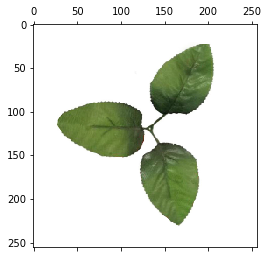

In [49]:
plt.matshow(dataset[5])